In [1]:
import pandas as pd

In [2]:
# fetching data
waves_filepath = 'C:/Users/AndresCervantesNassa/Documents/GitHub/BEDU-Data-Analysis/data/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv'
waves_data = pd.read_csv(waves_filepath, index_col=False)\
                .rename(columns={"Date/Time":"time",
                                 'Hs':'wave_height',
                                 'Hmax':'max_wave_height',
                                 'Tz':'zero_upcrossing_wave_period',
                                 'Tp':'peak_energy_wave_period',
                                 'Peak Direction':'peak_direction',
                                 'SST':'temperature'})

In [3]:
# cleaning data
waves_data_clean = waves_data[(waves_data.wave_height > 0) &
                              (waves_data.max_wave_height > 0) &
                              (waves_data.zero_upcrossing_wave_period > 0) &
                              (waves_data.peak_energy_wave_period > 0) &
                              (waves_data.peak_direction > 0) &
                              (waves_data.temperature > 0)]

In [4]:
# reducing the data sample so its processing time is shorter
waves_data_sample = waves_data_clean.iloc[41727:]

In [35]:
waves_data_sample.count()

time                           1727
wave_height                    1727
max_wave_height                1727
zero_upcrossing_wave_period    1727
peak_energy_wave_period        1727
peak_direction                 1727
temperature                    1727
dtype: int64

In [5]:
# prediction target
y_train = waves_data_sample['wave_height'].iloc[:1295]
y_test = waves_data_sample['wave_height'].iloc[1295:]

features_cols = ['zero_upcrossing_wave_period','peak_energy_wave_period','peak_direction','temperature']
X_train = waves_data_sample[features_cols].iloc[:1295]
X_test = waves_data_sample[features_cols].iloc[1295:]

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# 1/4 define
waves_model = DecisionTreeRegressor(random_state=1)
# 2/4 fit
waves_model.fit(X_train, y_train)
# 3/4 predict
wave_predictions = waves_model.predict(X_test)
# 4/4 validate
val_mae = mean_absolute_error(wave_predictions, y_test)

In [7]:
val_mae

0.9989606481481481

El MAE es de 0.9989 (m) lo que indica (creo yo) que el modelo es muy malo ya que cada tamaño de ola la predice con un error de prácticamente 1m.

In [22]:
type(wave_predictions)

numpy.ndarray

In [9]:
y_test.head()

43295    0.878
43296    0.937
43297    0.868
43298    0.802
43299    0.816
Name: wave_height, dtype: float64

# Visual comparison of actual vs predicted values

In [65]:
compare_df = y_test.to_frame(name='wave_height')

In [66]:
test_time = waves_data_sample.iloc[1295:]['time'].to_numpy()

In [67]:
compare_df['pred_val'] = wave_predictions
compare_df['time'] = test_time

In [68]:
compare_df

,wave_height,pred_val,time
43295,0.878,0.795,21/06/2019 23:30
43296,0.937,0.795,22/06/2019 00:00
43297,0.868,0.795,22/06/2019 00:30
43298,0.802,0.924,22/06/2019 01:00
43299,0.816,0.821,22/06/2019 01:30
...,...,...,...
43723,2.299,0.586,30/06/2019 21:30
43724,2.075,0.586,30/06/2019 22:00
43725,2.157,1.349,30/06/2019 22:30
43726,2.087,0.586,30/06/2019 23:00


In [69]:
wave_height_og_vals = compare_df.drop(['pred_val'], axis=1)
wave_height_pr_vals = compare_df.drop(['wave_height'], axis=1)\
                                .rename(columns={"pred_val":"wave_height"})

In [70]:
wave_height_og_vals['prediction'] = 0
wave_height_pr_vals['prediction'] = 1

In [71]:
wave_height_og_vals

,wave_height,time,prediction
43295,0.878,21/06/2019 23:30,0
43296,0.937,22/06/2019 00:00,0
43297,0.868,22/06/2019 00:30,0
43298,0.802,22/06/2019 01:00,0
43299,0.816,22/06/2019 01:30,0
...,...,...,...
43723,2.299,30/06/2019 21:30,0
43724,2.075,30/06/2019 22:00,0
43725,2.157,30/06/2019 22:30,0
43726,2.087,30/06/2019 23:00,0


In [72]:
wave_height_pr_vals

,wave_height,time,prediction
43295,0.795,21/06/2019 23:30,1
43296,0.795,22/06/2019 00:00,1
43297,0.795,22/06/2019 00:30,1
43298,0.924,22/06/2019 01:00,1
43299,0.821,22/06/2019 01:30,1
...,...,...,...
43723,0.586,30/06/2019 21:30,1
43724,0.586,30/06/2019 22:00,1
43725,1.349,30/06/2019 22:30,1
43726,0.586,30/06/2019 23:00,1


In [73]:
final_df = wave_height_og_vals.append(wave_height_pr_vals)

In [74]:
final_df

,wave_height,time,prediction
43295,0.878,21/06/2019 23:30,0
43296,0.937,22/06/2019 00:00,0
43297,0.868,22/06/2019 00:30,0
43298,0.802,22/06/2019 01:00,0
43299,0.816,22/06/2019 01:30,0
...,...,...,...
43723,0.586,30/06/2019 21:30,1
43724,0.586,30/06/2019 22:00,1
43725,1.349,30/06/2019 22:30,1
43726,0.586,30/06/2019 23:00,1


[[<matplotlib.axis.XTick at 0x14ba34b0f10>,

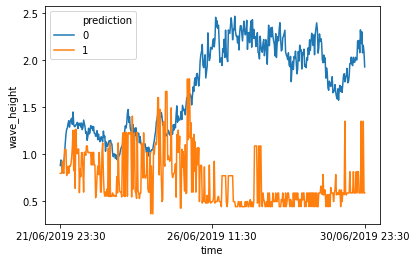

In [77]:
import seaborn as sns

sns.lineplot(x=final_df['time'], y=final_df['wave_height'], hue=final_df['prediction'])\
    .set(xticks=[0,215,431])    